In [11]:
# run setup script to update ejana and eic-smear for outdated docker container
import os
home_dir = '/home/eicuser/epw/share/eic_spect/'
setup = "/home/eicuser/epw/share/eic_spect/dockerCommands.csh"
!source {setup};

Already up-to-date.
-- Configuring done
-- Generating done
-- Build files have been written to: /container/app/eic-smear/build/master
[100%] Built target eicsmear
[100%] Built target eicsmear
Install the project...
-- Install configuration: ""
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/EventGmcTrans.h
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/EventBase.h
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/ParticleIdentifier.h
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/Kinematics.h
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/Pythia6EventBuilder.h
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/Pythia6ParticleBuilder.h
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/EventMi

In [12]:
import ROOT

In [13]:
from pyjano.jana import Jana
jana = Jana()

In [14]:
jana.plugins_gui()

HTML(value='\n\n\n    <input type="hidden" class=".plugin_data_input" value="">\n    <div class="row">\n      …

<IPython.core.display.Javascript object>

In [17]:
# set input and output directories, then check contents
input_name = '5_41' # Beam energies: 5_41, 5_100, 10_100, 18_275 

input_dir = home_dir + 'lund_generated/'
output_dir = home_dir + 'outTree/'
os.system('mkdir -p %s' % output_dir)

0

In [18]:
!ls {input_dir}
!ls {output_dir}

zc_10_100.txt  zc_18_275.txt  zc_5_100.txt  zc_5_41.txt
pythia_nosm.root     zc_smbeast_10_100.root    zc_smephenix_5_100.root
pythia_smjleic.root  zc_smbeast_18_275.root    zc_smephenix_5_41.root
zc_nosm_10_100.root  zc_smbeast_5_100.root     zc_smjleic_10_100.root
zc_nosm_18_275.root  zc_smbeast_5_41.root      zc_smjleic_18_275.root
zc_nosm_5_100.root   zc_smephenix_10_100.root  zc_smjleic_5_100.root
zc_nosm_5_41.root    zc_smephenix_18_275.root  zc_smjleic_5_41.root


## Create signal TTrees with smearing of all detectors

In [19]:
# loop over detectors and make smeard files
detectors = ['jleic', 'beast', 'ephenix']

for detector_name in detectors:
    Jana().plugin('lund_reader')\
          .plugin('event_writer')\
          .plugin('eic_smear', detector=detector_name)\
          .plugin('jana', nevents=50000, output='%s/zc_sm%s_%s.root' % (output_dir,detector_name,input_name))\
          .source('%s/zc_%s.txt' % (input_dir,input_name))\
          .run()

To compare smeared data with not smeared, lets create also not smeared data set

In [21]:
Jana().plugin('lund_reader')\
      .plugin('event_writer')\
      .plugin('jana', nevents=50000, output='%s/zc_nosm_%s.root' % (output_dir,input_name))\
      .source('%s/zc_%s.txt' % (input_dir,input_name))\
      .run()

In [22]:
# Open root file to test output
file = ROOT.TFile('%s/zc_smbeast_10_100.root' % (output_dir))

In [23]:
# Preparing histograms
PSmearVsPOrig = ROOT.TH2D('PSmearVsPOrig', '; p_{orig} (GeV); p_{smear} (GeV)', 100, 0, 25, 100, 0, 25)

pid_only = ROOT.TCut('pdg==11')   # e-

In [24]:
# Reading a tree from the file
tree = file.Get('events').Get('tree')

# Filling the histograms from the tree
canvas = ROOT.TCanvas('canvas', 'canvas',600,400)
tree.Draw('p:smear_orig_p >> PSmearVsPOrig', pid_only)

47317

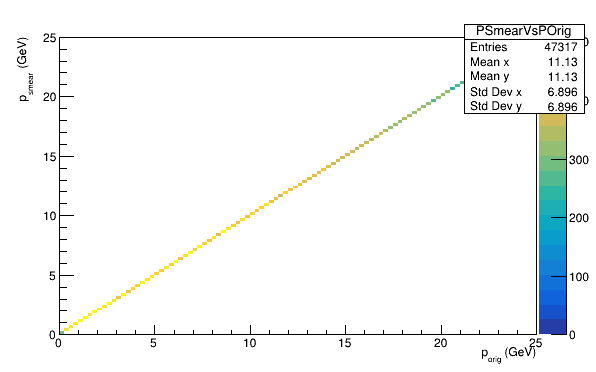

In [25]:
pad = canvas.cd()
#pad.SetLogy(True)
PSmearVsPOrig.Draw("colz")
canvas.Draw()

## Create PYTHIA TTrees with smearing of all generators

In [39]:
input_dir = '../../PYTHIA_6.5/PHP/'
input_name = 'pythia_PHP_10x100' #'pythia_e-p_10x100_Q0_100k_msel2_PHP'

In [40]:
output_name = '10_100' # Beam energies: 5_41, 5_100, 10_100, 18_275 

for detector_name in detectors:
    Jana().plugin('lund_reader')\
          .plugin('event_writer')\
          .plugin('eic_smear', detector=detector_name)\
          .plugin('jana', nevents=100000, output='%s/pythia_sm%s_%s.root' % (output_dir,detector_name,output_name))\
          .source('%s/%s.txt' % (input_dir,input_name))\
          .run()

In [28]:
Jana().plugin('lund_reader')\
      .plugin('event_writer')\
      .plugin('jana', nevents=100000, output='%s/pythia_nosm.root' % (output_dir))\
      .source('%s/%s.txt' % (input_dir,input_name))\
      .run()

## Run TSelector over trees to create Zc histograms

In [29]:
os.chdir('/home/eicuser/epw/share/eic_spect/selector/')
os.listdir()

['selector_zc_C.d', 'selector_zc.C', 'runSelector.C', 'selector_zc.h']

In [30]:
os.system('root -l -b -q runSelector.C')

0


Processing runSelector.C...
Processing detector: jleic at 5_41
Processing detector: jleic at 5_100
Processing detector: jleic at 10_100
Processing detector: jleic at 18_275
Processing detector: beast at 5_41
Processing detector: beast at 5_100
Processing detector: beast at 10_100
Processing detector: beast at 18_275
Processing detector: ephenix at 5_41
Processing detector: ephenix at 5_100
Processing detector: ephenix at 10_100
Processing detector: ephenix at 18_275


In [ ]:
# Run plotting macros to make plots

## Plotting macro in python workbook

In [ ]:
TFile *file[3];
TString detectors[3] = {"beast", "jleic", "ephenix"};
TString detectorLabel[3] = {"BeAST", "JLEIC", "ePHENIX"};
int color[3] = {1,2,4};

    const int num1D = 2; const int num2D = 6;
    TString name1D[num1D] = {"MassElePos","MassJpsiPion"};
    TString name2D[num2D] = {"DeltaPOverPVsEtaEle","DeltaPOverPVsEtaPos","DeltaPOverPVsEtaPion","PVsEtaEle","PVsEtaPos","PVsEtaPion"};
    TH1F *h1[3];
    TH2F *h2[3];
    
    TCanvas *cc = new TCanvas("cc", "cc", 900, 400); cc->Divide(3,1);
    TCanvas *dd = new TCanvas("dd", "dd", 900, 400); dd->Divide(3,1);
    
    // process data from each detector in series
    for(int i=0; i<3; i++) {
        cout<<"Plotting detector: "<<detectors[i].Data()<<endl;
        file[i] = TFile::Open(Form("../outHist/output_%s_%d_%d.root", detectors[i].Data(), Ee, Ep));
    }
    
    TLine ln[3];
    for(int j=0; j<num1D; j++) {
        for(int i=0; i<3; i++) {
            cc->cd(i+1);
            
            h1[i] = (TH1F*)file[i]->Get(name1D[j]);
            h1[i]->SetLineColor(color[i]);
            h1[i]->Draw();
            //else h1[i]->Draw("same");
            
            // add labels and lines to plot
            double vertical = h1[i]->GetMaximum()*0.75;
            double vertical_offset = vertical * 0.1;
            double horizontal = 2.4;
            ln[i] = TLine(3.1,0,3.1,h1[i]->GetMaximum());
            if(j>0) {
                horizontal = 3.4;
                ln[i] = TLine(3.9,0,3.9,h1[i]->GetMaximum());
            }
            
            auto *th1 = new TText(horizontal,vertical,Form("%s", detectorLabel[i].Data()));
            th1->SetTextAlign(21); th1->SetTextSize(0.07);
            auto *th2 = new TText(horizontal,vertical-vertical_offset,Form("%d x %d", Ee, Ep));
            th2->SetTextAlign(21); th2->SetTextSize(0.07);
            th1->Draw("same"); th2->Draw("same");
            
            ln[i].SetLineColor(color[i]);
            ln[i].SetLineStyle(kDashed);
            ln[i].Draw("same");
        }
        
        cc->Print(Form("plots/%s_%d_%d.pdf",name1D[j].Data(),Ee,Ep));
    }
            
    for(int j=0; j<num2D; j++) {
        for(int i=0; i<3; i++) {
            dd->cd(i+1);
            
            h2[i] = (TH2F*)file[i]->Get(name2D[j]);
            h2[i]->Draw("colz");
        
            // add labels to plot
            double vertical = 0.07;
            double vertical_offset = 0.015;
            if(j>2) {
                vertical = 16;
                vertical_offset = 1.5;
            }
            auto *th1 = new TText(0.5,vertical,Form("%s", detectorLabel[i].Data()));
            th1->SetTextAlign(21); th1->SetTextSize(0.07);
            auto *th2 = new TText(0.5,vertical-vertical_offset,Form("%d x %d", Ee, Ep));
            th2->SetTextAlign(21); th2->SetTextSize(0.07);
            th1->Draw("same"); th2->Draw("same");
        }
        
        dd->Print(Form("plots/%s_%d_%d.pdf",name2D[j].Data(),Ee,Ep));
    }